<a href="https://colab.research.google.com/github/JesusCasas024/Support-Vector-Machine/blob/main/SVM_JECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support vector machine algorithm


Support Vector Machine (SVM) is a powerful machine learning algorithm used for both classification and regression tasks. SVM aims to find the optimal decision boundary that best separates different classes in a dataset or predicts a continuous target variable. The key intuition behind SVM lies in finding a hyperplane in a high-dimensional space that maximizes the margin between classes. In simpler terms, imagine you have a dataset with two classes represented by points on a graph, SVM searches for the best-fitting line (or hyperplane in higher dimensions) that creates the widest gap between the nearest points of these classes. These nearest points, known as support vectors, help to determe the decision boundary. By focusing on these support vectors, SVM generalizes well to unseen data, making it effective even in high-dimensional spaces.

#Data pre-processing

In [ ]:
#Import the necessary libraries to work with the dataset to perform a pre-processing, defining important features and then creating and training the model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#The libraries got functions to read and work the information, mathematical operations, use of metrics, generate the training and test data, use the proper algorithm, etc.

In [ ]:
#Start reading de uploaded dataframe to have workable data.
df=pd.read_csv('/content/kaggle.csv') #Establish the dataframe with name df to simple work.
df.head() #See principal columns and observations.

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60


In [ ]:
# Set pandas library to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
# Check for empty spaces in the DataFrame
empty_spaces = df.isna()
print(df.isna().sum())


Lat                         0
Lng                         0
What Dinosaurs Eat          0
Accepted Name               0
Country                     0
Cc                          0
Diet                        0
Early Interval              0
Formation                 111
Geological Interval         0
Geological Time Period      0
Ref Author                  0
Ref Pubyr                   0
State                       0
Max Ma                      0
Min Ma                      0
dtype: int64


In [ ]:
#Fill the empty spaces with the mode of the column.
df_filled = df.fillna(df.mode(numeric_only=True))

In [ ]:
#First approach to df to get unnecessary columns.
#Drop unnecesary data columns; Authors' information is irrelevant to predict about dinosaurs.

df = df.drop(columns = 'Ref Author', axis=1, errors = 'ignore')
df = df.drop(columns = 'Ref Pubyr', axis=1, errors = 'ignore') #ignore errors in case of non-existent columns message.
df = df.drop(columns = 'Cc', axis=1, errors = 'ignore')# Cc column is only the abbreviation of the country, not needed.

In [ ]:
df.head() #Review if the columns selected were dropped.

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Alberta,83.5,70.60


In [ ]:
# Select categorical columns in the dataframe to convert them into numerical data.
category_columns = ['What Dinosaurs Eat', 'Accepted Name', 'Country', 'Diet', 'Early Interval', 'Formation', 'Geological Interval', 'Geological Time Period', 'State']

# For loop to convert all categorical columns into specific numbers
for columns in category_columns:
    df[columns] = LabelEncoder().fit_transform(df[columns]) #Assign a number for each category found in the columns.


In [ ]:
df.head(50) # Review if the conversion was properly done by printing some rows

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,State,Max Ma,Min Ma
0,42.933300,123.966698,2,132,1,2,49,176,27,1,27,150.8,132.90
1,41.799999,120.733330,3,571,1,4,37,203,4,0,27,130.0,122.46
2,41.799999,120.733330,3,117,1,4,37,203,4,0,27,130.0,122.46
3,50.740726,-111.528732,1,288,0,0,40,41,8,0,2,83.5,70.60
4,50.737015,-111.549347,1,288,0,0,40,41,8,0,2,83.5,70.60
5,50.737297,-111.528931,2,121,0,2,40,41,8,0,2,83.5,70.60
6,50.723866,-111.564636,1,288,0,0,40,41,8,0,2,83.5,70.60
7,50.740471,-111.525337,1,288,0,0,40,41,8,0,2,83.5,70.60
8,50.786999,-111.601021,1,288,0,0,40,41,8,0,2,83.5,70.60
9,51.804600,-112.981903,1,18,0,0,51,157,20,0,2,72.1,66.00


#Dataset establishment

In [ ]:
#Divide the datafram into a label for X and Y data, features and main target to predict
X = df.drop(columns=['What Dinosaurs Eat']) # The X part of the dataset excluding the target
y = df['What Dinosaurs Eat'] # Y target of the dataset with the specific columnd
df = pd.concat([X, y], axis=1) # Combine the X and Y parts to have the complete labeled dataset

In [ ]:
df.head() # Review if the columns are located as the label established

,Lat,Lng,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,State,Max Ma,Min Ma,What Dinosaurs Eat
0,42.933300,123.966698,132,1,2,49,176,27,1,27,150.8,132.90,2
1,41.799999,120.733330,571,1,4,37,203,4,0,27,130.0,122.46,3
2,41.799999,120.733330,117,1,4,37,203,4,0,27,130.0,122.46,3
3,50.740726,-111.528732,288,0,0,40,41,8,0,2,83.5,70.60,1
4,50.737015,-111.549347,288,0,0,40,41,8,0,2,83.5,70.60,1


#Classification model with Support vector machine algorithm
## Target: What the dinosaurs eat

In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM classifier model
S_V_M_model = svm.SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
S_V_M_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = S_V_M_model.predict(X_test)

# Calculate the accuracy of the model as evaluation metric
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9614604462474645


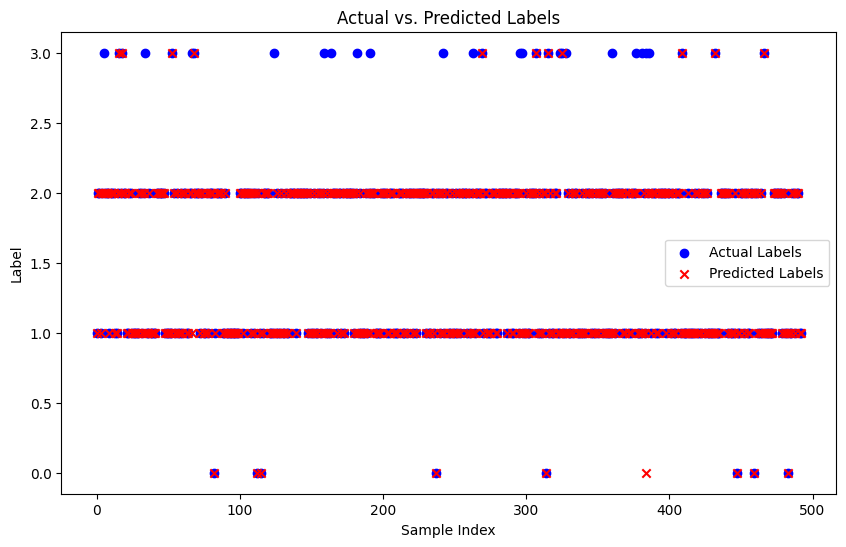

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Labels', marker='o')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

#Support Vectors comparisson in 2D with some Test data

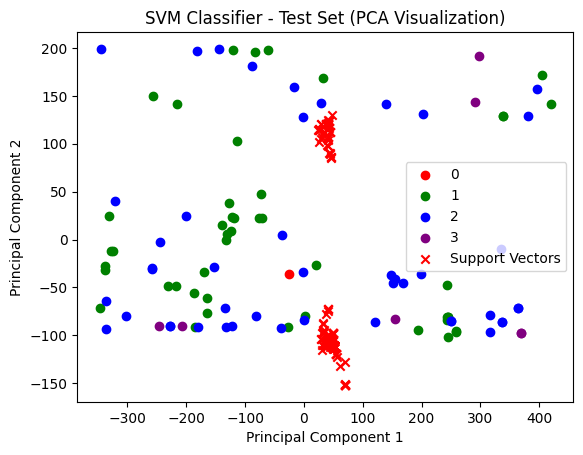

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the sample size for visualization
sample_size = 100  # You can adjust this based on your available memory
X_sample, y_sample = X_test[:sample_size], y_test[:sample_size]

# Apply PCA to reduce the dimensionality of X_sample to 2D and see vectors
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Plot data points for each class in 2D PCA space
for i, j in enumerate(np.unique(y_sample)):
    plt.scatter(X_pca[y_sample == j, 0], X_pca[y_sample == j, 1],
                color=ListedColormap(('red', 'green', 'blue', 'purple'))(i), label=j)
#Get the support vectors to enmark them on the Test data
support_vectors = S_V_M_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

#Plot the visualization with vectors
plt.title('SVM Classifier - Test Set (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


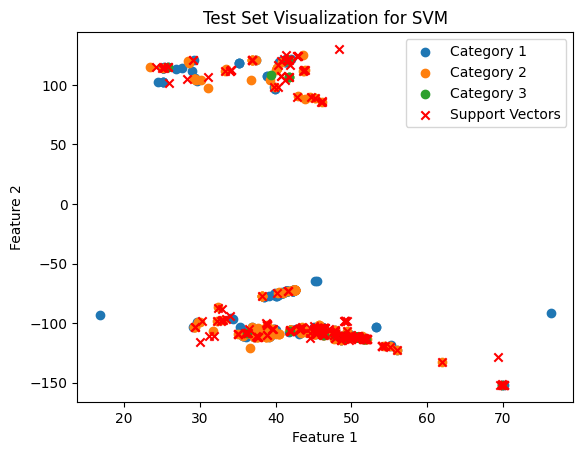

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Reset the index of the DataFrame if it has a custom index
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


# Establish the number of categories from the datastet Y target
categories = [1, 2, 3]

# Create a scatter plot for each category
for category in categories:
    indices = np.where(y_test == category)[0]
    plt.scatter(X_test.iloc[indices, 0], X_test.iloc[indices, 1], label=f'Category {category}')

#Get the support vectors of the model and plot them with the chosen data from the test.
support_vectors = S_V_M_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

# Plot labels taking first 2 features
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set Visualization for SVM')
plt.legend()
plt.show()
